Cirrhosis, also known as liver cirrhosis or hepatic cirrhosis, and end-stage liver disease, is the impaired liver function caused by the formation of scar tissue known as fibrosis due to damage caused by liver disease.

# Importing the libraries

In [59]:
import pandas as pd #for reading the dataset
import numpy as np #for mathematical processing
import matplotlib.pyplot as plt # for plotting the dataset
import seaborn as sns # for presenting the dataset
from sklearn.model_selection import train_test_split #for splitting the dataset
from sklearn.linear_model import LogisticRegression #model used
from sklearn.metrics import accuracy_score #for evaluation
from pandas.plotting import scatter_matrix

# Loading the dataset


In [60]:
data=pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")

# Exploring the dataset

In [61]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [62]:
data.shape

(418, 20)

In [63]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [64]:
datatypes=data.dtypes
print(datatypes)

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [65]:
data.memory_usage()

Index             128
ID               3344
N_Days           3344
Status           3344
Drug             3344
Age              3344
Sex              3344
Ascites          3344
Hepatomegaly     3344
Spiders          3344
Edema            3344
Bilirubin        3344
Cholesterol      3344
Albumin          3344
Copper           3344
Alk_Phos         3344
SGOT             3344
Tryglicerides    3344
Platelets        3344
Prothrombin      3344
Stage            3344
dtype: int64

In [66]:
memory_before = data.memory_usage().sum() / (1024**2)

In [67]:
memory_before

0.06390380859375

In [68]:
data['Cholesterol'] = data['Cholesterol'].astype('Int64')
data['Copper'] = data['Copper'].astype('Int64')
data['Tryglicerides'] = data['Tryglicerides'].astype('Int64')
data['Platelets'] = data['Platelets'].astype('Int64')
data['Stage'] = data['Stage'].astype('Int64')

In [69]:
datatypes=data.dtypes
print(datatypes)

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol        Int64
Albumin          float64
Copper             Int64
Alk_Phos         float64
SGOT             float64
Tryglicerides      Int64
Platelets          Int64
Prothrombin      float64
Stage              Int64
dtype: object


In [70]:
data.memory_usage()

Index             128
ID               3344
N_Days           3344
Status           3344
Drug             3344
Age              3344
Sex              3344
Ascites          3344
Hepatomegaly     3344
Spiders          3344
Edema            3344
Bilirubin        3344
Cholesterol      3762
Albumin          3344
Copper           3762
Alk_Phos         3344
SGOT             3344
Tryglicerides    3762
Platelets        3762
Prothrombin      3344
Stage            3762
dtype: int64

In [71]:
memory_after = data.memory_usage().sum() / (1024**2)

In [72]:
memory_after

0.06589698791503906

# Statistical Analysis

Converting string data to integer

In [73]:
data=data.drop(['ID'],axis=1)

In [74]:
data['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [75]:
data['Drug'].value_counts()

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

In [76]:
data['Sex'].value_counts()

Sex
F    374
M     44
Name: count, dtype: int64

In [77]:
data['Ascites'].value_counts()

Ascites
N    288
Y     24
Name: count, dtype: int64

In [78]:
data['Hepatomegaly'].value_counts()

Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

In [79]:
data['Spiders'].value_counts()

Spiders
N    222
Y     90
Name: count, dtype: int64

In [80]:
data['Edema'].value_counts()

Edema
N    354
S     44
Y     20
Name: count, dtype: int64

Converting string data to categorical data

In [81]:
# convert categorical columns to numerical values
data.replace({'Status':{'C':0,'D':1,'CL':2},'Drug':{'D-penicillamine':0,'Placebo':1},'Sex':{'M':0,'F':1},
                      'Ascites':{'N':0,'Y':1},'Hepatomegaly':{'N':0,'Y':1}, 'Spiders':{'N':0, 'Y':1},'Edema':{'N':0,'S':1 ,'Y':2}},inplace=True)

## Univariate analysis- Univariate analysis involves looking at the distribution of a single variable

Using summary Statistics

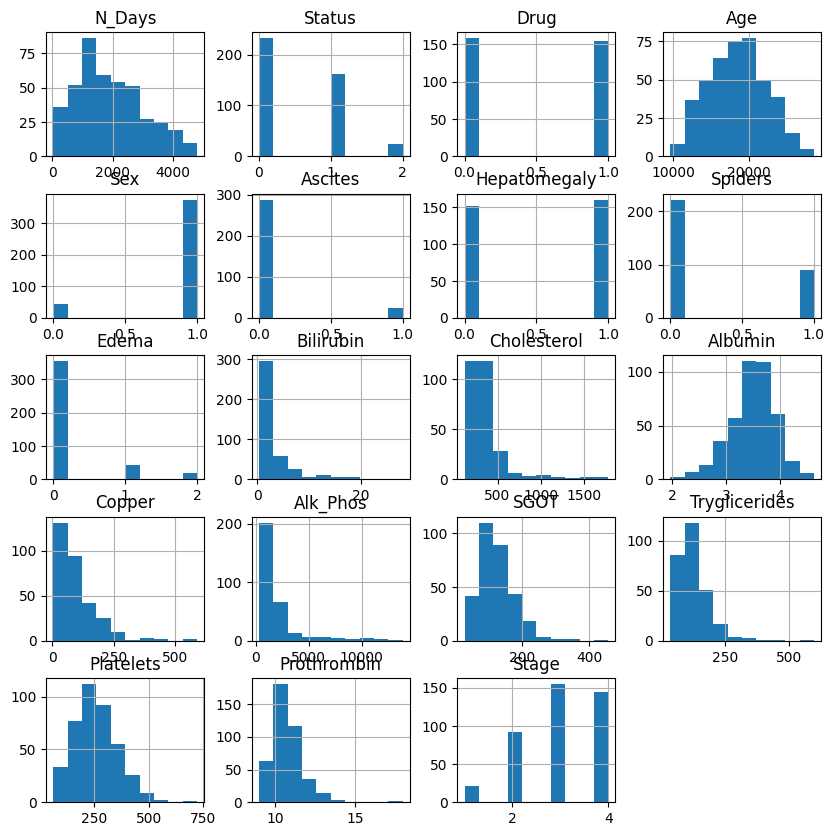

In [82]:
data.hist()
plt.rcParams['figure.figsize']=[10,10]
plt.show()

Observation-
*   Some categorical feature columns are highly imbalanced for e.g Sex,Ascites
*   Some numerical feature are highly skewed and does not follow normal

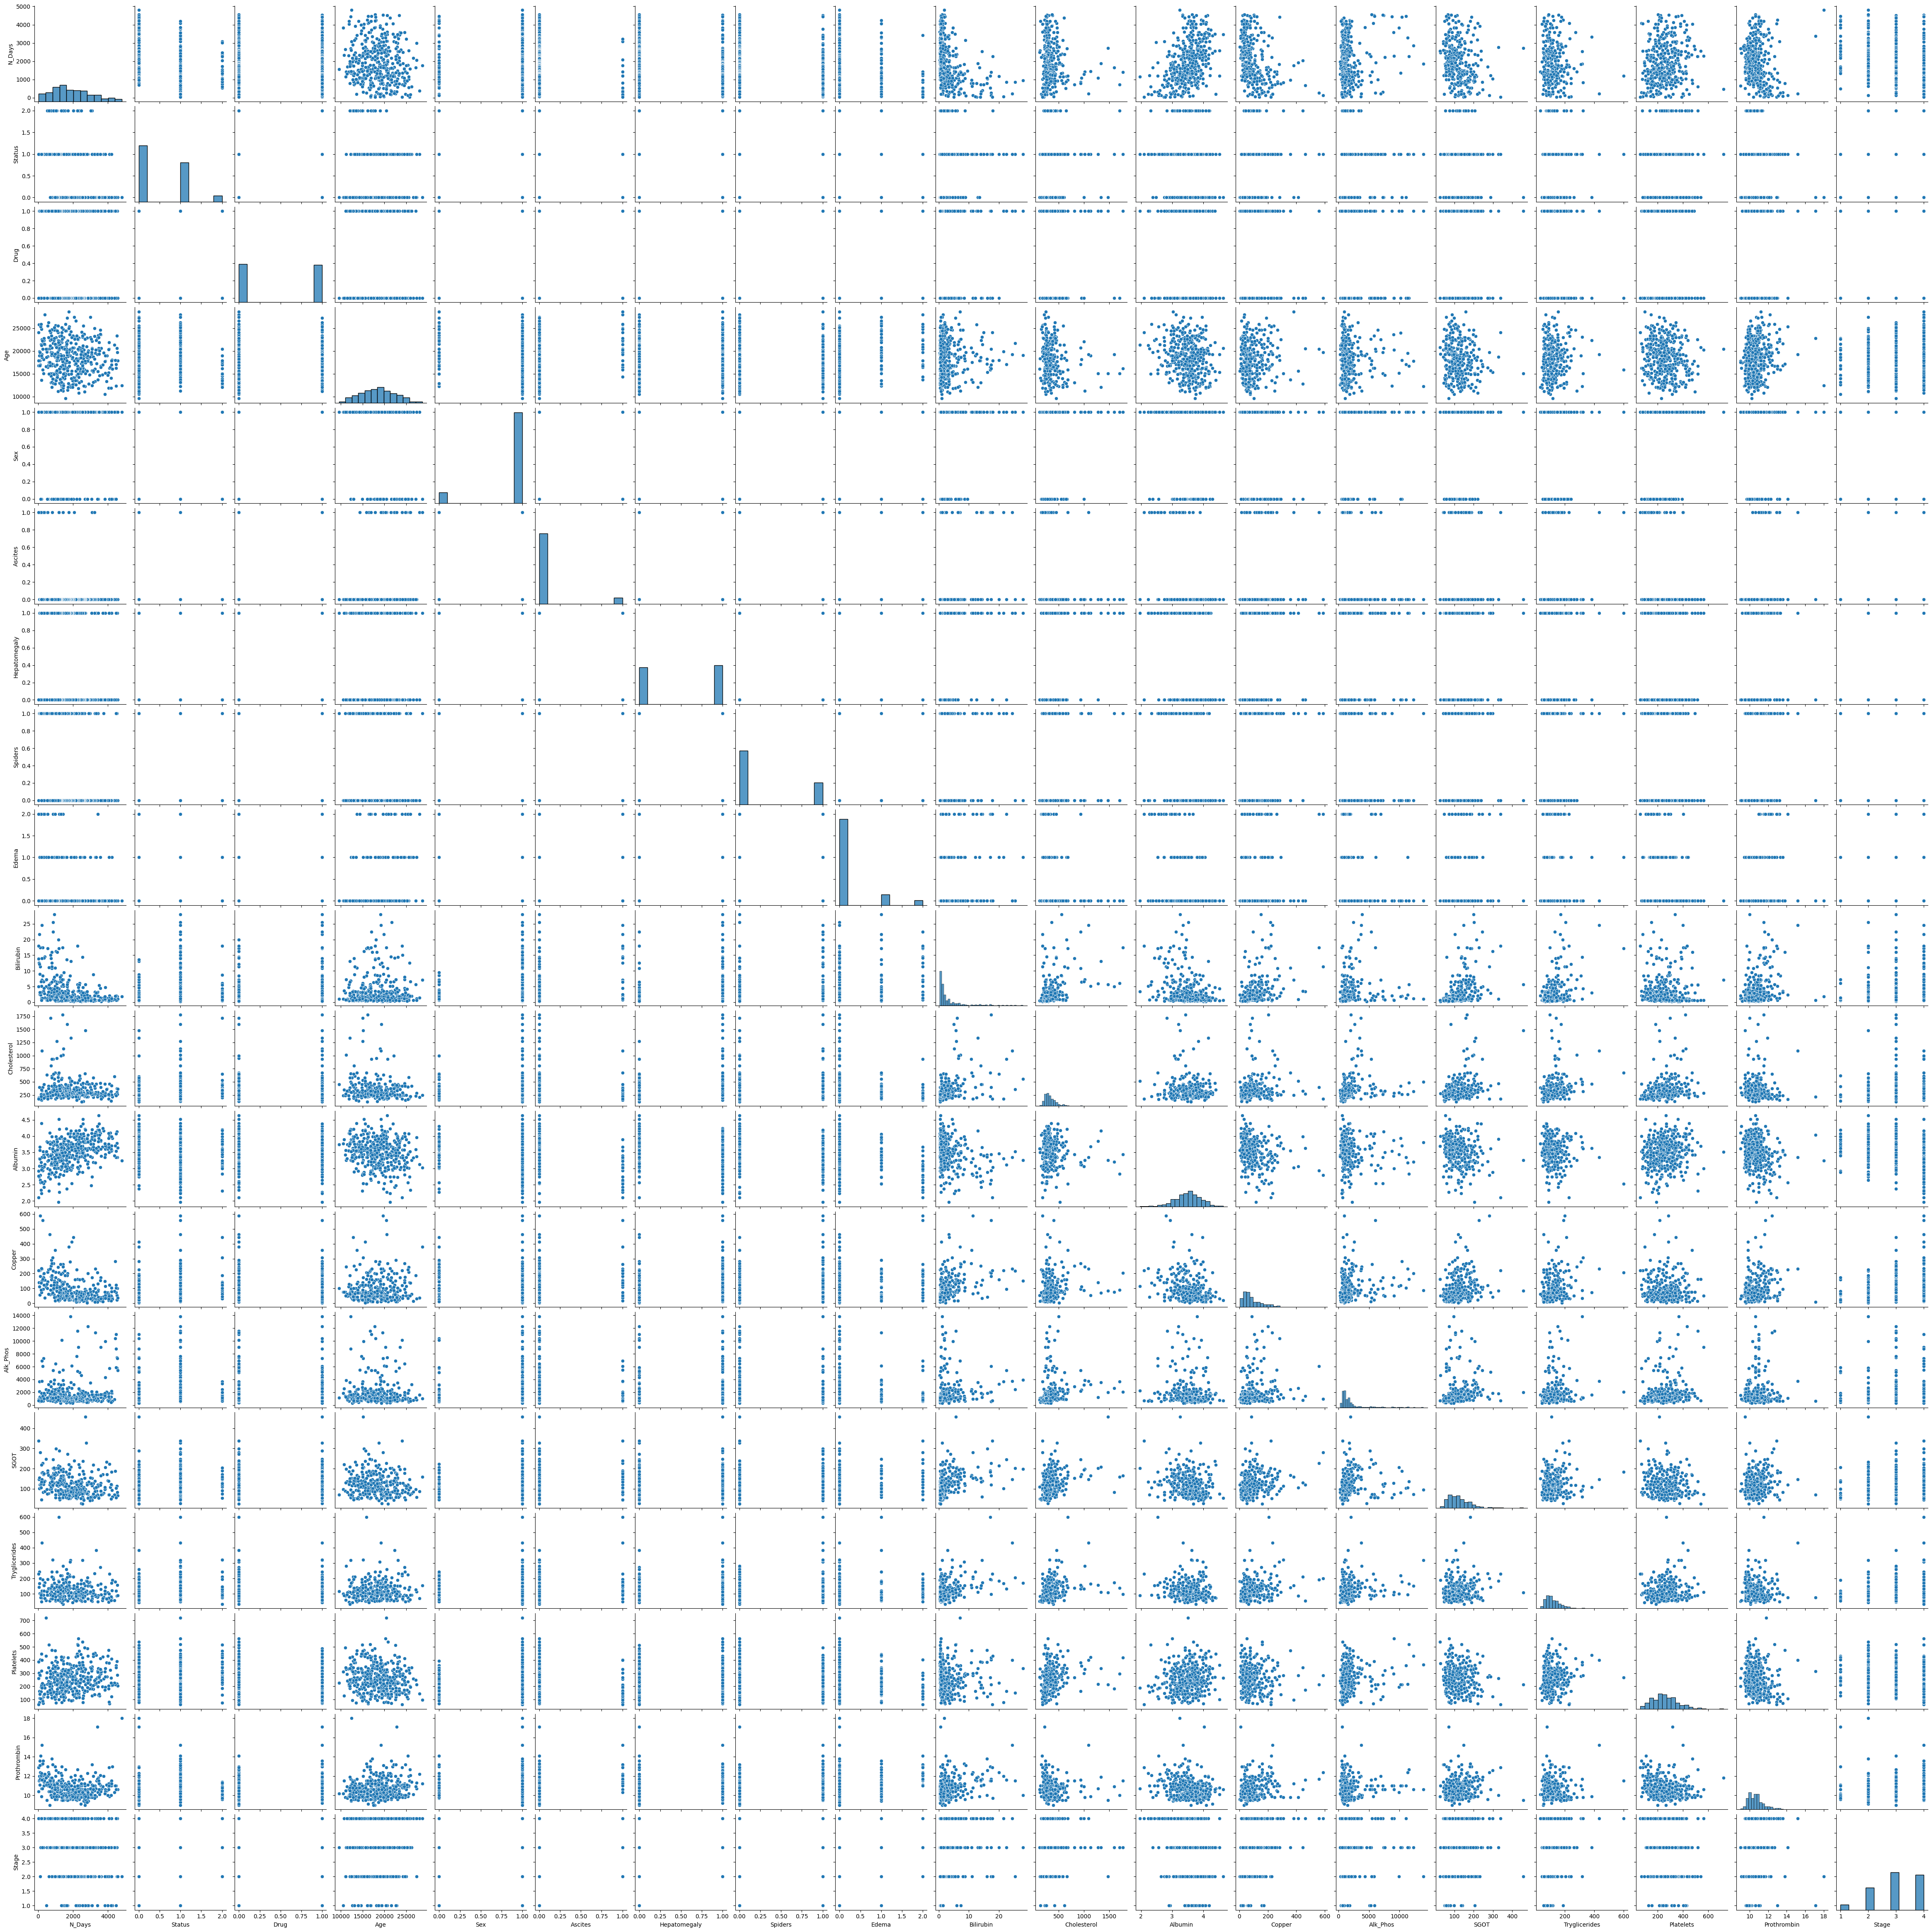

In [58]:
from seaborn import pairplot

# Create a pairplot with all numerical variables in the data
pairplot(data)

Correlation

In [83]:
#lets find out the correlation between each attribute in the traindata
corr=data.corr()
corr

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.376827,-0.008362,-0.125934,0.007386,-0.307135,-0.288141,-0.266402,-0.304634,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Status,-0.376827,1.000000,-0.025830,0.022415,-0.099881,0.206508,0.298976,0.173932,0.214533,0.348628,0.193244,-0.208872,0.351669,0.146357,0.251723,0.187985,0.015405,0.212250,0.280201
Drug,-0.008362,-0.025830,1.000000,-0.134242,0.055567,-0.044415,0.102935,0.008164,-0.012370,0.085697,0.019148,0.009022,0.000060,-0.018316,0.042007,0.008572,0.033804,0.073213,0.066298
Age,-0.125934,0.022415,-0.134242,1.000000,-0.163341,0.231841,0.075368,-0.050147,0.196916,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Sex,0.007386,-0.099881,0.055567,-0.163341,1.000000,-0.008688,-0.050949,0.141379,-0.033229,0.027652,0.011421,-0.030351,-0.240146,-0.032161,0.003610,-0.050511,0.090594,-0.070476,-0.017235
Ascites,-0.307135,0.206508,-0.044415,0.231841,-0.008688,1.000000,0.161045,0.161339,0.585731,0.378295,-0.057983,-0.389348,0.226663,0.010615,0.092264,0.207103,-0.215523,0.320098,0.250187
Hepatomegaly,-0.288141,0.298976,0.102935,0.075368,-0.050949,0.161045,1.000000,0.295054,0.170979,0.301725,0.137713,-0.299190,0.234131,0.110236,0.136035,0.160466,-0.190229,0.187358,0.467293
Spiders,-0.266402,0.173932,0.008164,-0.050147,0.141379,0.161339,0.295054,1.000000,0.272282,0.288349,0.062389,-0.233728,0.261460,0.037864,0.130724,0.096665,-0.161414,0.246182,0.291512
Edema,-0.304634,0.214533,-0.012370,0.196916,-0.033229,0.585731,0.170979,0.272282,1.000000,0.330803,-0.108267,-0.331281,0.257297,0.023525,0.140674,0.083193,-0.203826,0.331638,0.243216
Bilirubin,-0.403953,0.348628,0.085697,0.002362,0.027652,0.378295,0.301725,0.288349,0.330803,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731


In [84]:
#rounding the corr
corr = data.corr().round(2)
print(corr)

               N_Days  Status  Drug   Age   Sex  Ascites  Hepatomegaly  \
N_Days           1.00   -0.38 -0.01 -0.13  0.01    -0.31         -0.29   
Status          -0.38    1.00 -0.03  0.02 -0.10     0.21          0.30   
Drug            -0.01   -0.03  1.00 -0.13  0.06    -0.04          0.10   
Age             -0.13    0.02 -0.13  1.00 -0.16     0.23          0.08   
Sex              0.01   -0.10  0.06 -0.16  1.00    -0.01         -0.05   
Ascites         -0.31    0.21 -0.04  0.23 -0.01     1.00          0.16   
Hepatomegaly    -0.29    0.30  0.10  0.08 -0.05     0.16          1.00   
Spiders         -0.27    0.17  0.01 -0.05  0.14     0.16          0.30   
Edema           -0.30    0.21 -0.01  0.20 -0.03     0.59          0.17   
Bilirubin       -0.40    0.35  0.09  0.00  0.03     0.38          0.30   
Cholesterol     -0.14    0.19  0.02 -0.16  0.01    -0.06          0.14   
Albumin          0.43   -0.21  0.01 -0.18 -0.03    -0.39         -0.30   
Copper          -0.36    0.35  0.00  0

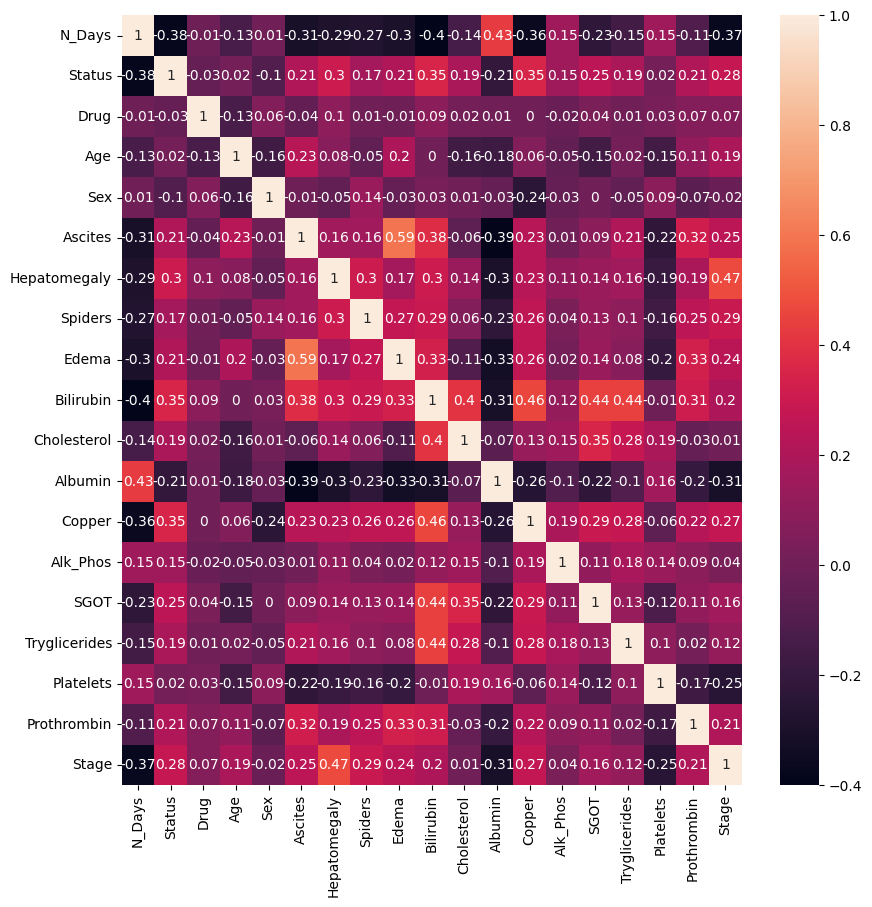

In [85]:
#plotting the heatmap
sns.heatmap(corr, annot=True)
plt.show()


Plotting the lower half

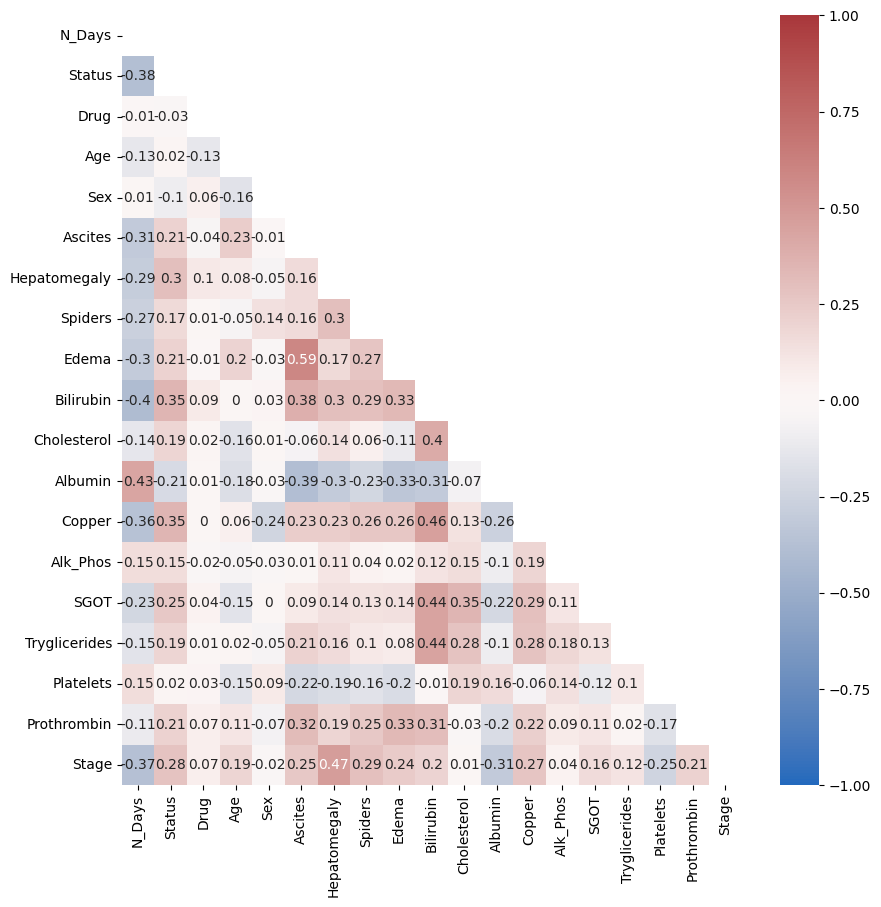

In [86]:
low = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=low)
plt.show()

Selecting Only Strong Correlations in a Correlation Matrix

In [87]:
corr = data.corr()
corr = data.unstack()
corr = corr[abs(corr) >= 0.7]

print(corr)

N_Days  0       400
        1      4500
        2      1012
        3      1925
        4      1504
               ... 
Stage   413       3
        414       4
        415       3
        416       3
        417       4
Length: 5392, dtype: object


Selecting Only Positive / Negative Correlations in a Correlation Matrix

In [88]:
corr = data.corr()
corr = corr.unstack()
corr = corr[corr > 0]

print(corr)

N_Days  N_Days           1.000000
        Sex              0.007386
        Albumin          0.430829
        Alk_Phos         0.149269
        Platelets        0.151361
                           ...   
Stage   Alk_Phos         0.041273
        SGOT             0.164945
        Tryglicerides    0.123899
        Prothrombin      0.207802
        Stage            1.000000
Length: 239, dtype: float64


In [89]:
corr = data.corr(method = 'pearson')
corr

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.376827,-0.008362,-0.125934,0.007386,-0.307135,-0.288141,-0.266402,-0.304634,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Status,-0.376827,1.000000,-0.025830,0.022415,-0.099881,0.206508,0.298976,0.173932,0.214533,0.348628,0.193244,-0.208872,0.351669,0.146357,0.251723,0.187985,0.015405,0.212250,0.280201
Drug,-0.008362,-0.025830,1.000000,-0.134242,0.055567,-0.044415,0.102935,0.008164,-0.012370,0.085697,0.019148,0.009022,0.000060,-0.018316,0.042007,0.008572,0.033804,0.073213,0.066298
Age,-0.125934,0.022415,-0.134242,1.000000,-0.163341,0.231841,0.075368,-0.050147,0.196916,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Sex,0.007386,-0.099881,0.055567,-0.163341,1.000000,-0.008688,-0.050949,0.141379,-0.033229,0.027652,0.011421,-0.030351,-0.240146,-0.032161,0.003610,-0.050511,0.090594,-0.070476,-0.017235
Ascites,-0.307135,0.206508,-0.044415,0.231841,-0.008688,1.000000,0.161045,0.161339,0.585731,0.378295,-0.057983,-0.389348,0.226663,0.010615,0.092264,0.207103,-0.215523,0.320098,0.250187
Hepatomegaly,-0.288141,0.298976,0.102935,0.075368,-0.050949,0.161045,1.000000,0.295054,0.170979,0.301725,0.137713,-0.299190,0.234131,0.110236,0.136035,0.160466,-0.190229,0.187358,0.467293
Spiders,-0.266402,0.173932,0.008164,-0.050147,0.141379,0.161339,0.295054,1.000000,0.272282,0.288349,0.062389,-0.233728,0.261460,0.037864,0.130724,0.096665,-0.161414,0.246182,0.291512
Edema,-0.304634,0.214533,-0.012370,0.196916,-0.033229,0.585731,0.170979,0.272282,1.000000,0.330803,-0.108267,-0.331281,0.257297,0.023525,0.140674,0.083193,-0.203826,0.331638,0.243216
Bilirubin,-0.403953,0.348628,0.085697,0.002362,0.027652,0.378295,0.301725,0.288349,0.330803,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731


## Check the distribution of columns

<Axes: ylabel='Density'>

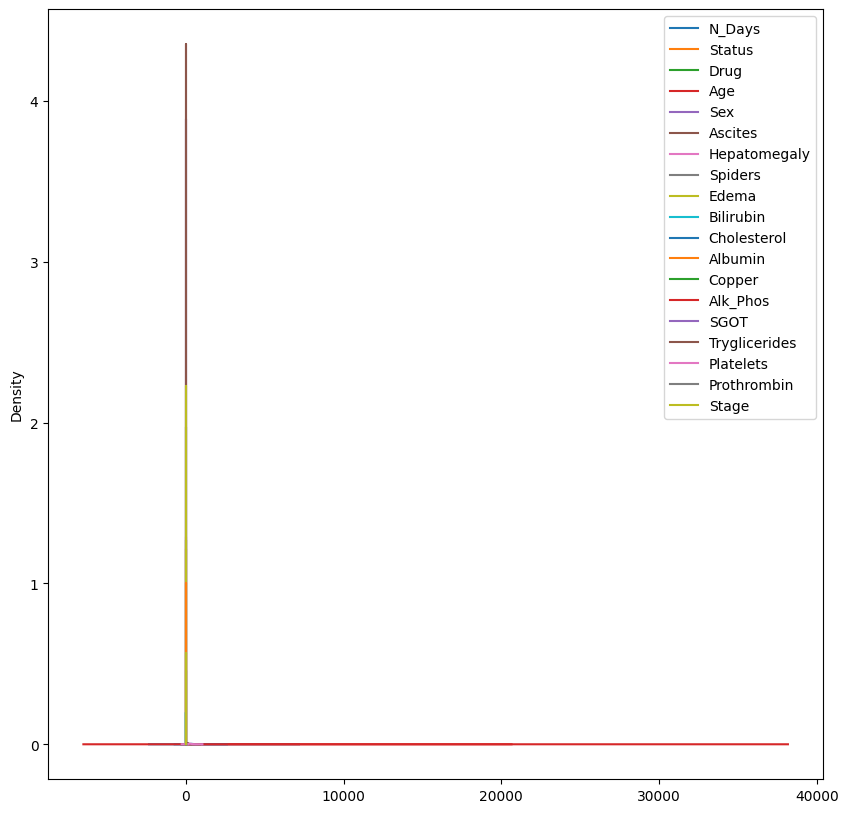

In [91]:
data.plot(kind='kde')

<Axes: ylabel='Frequency'>

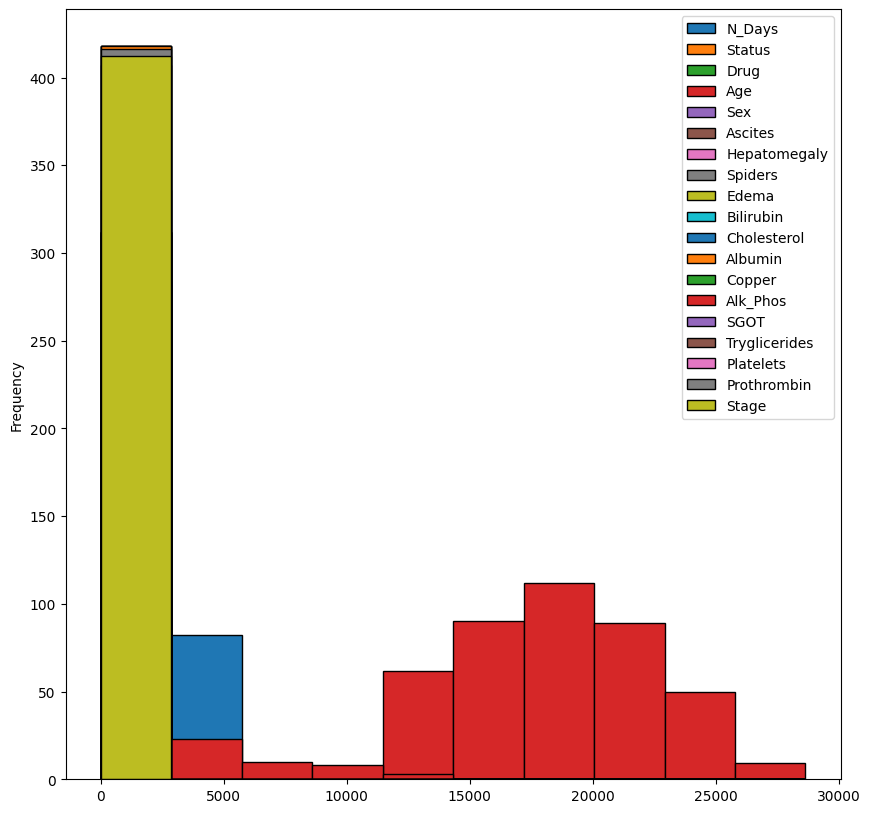

In [92]:
data.plot(kind='hist', edgecolor='black')

In [94]:
# skewness along the index axis
data.skew(axis = 0, skipna = True)

N_Days           0.472602
Status           0.783066
Drug             0.025767
Age              0.086850
Sex             -2.581753
Ascites          3.190787
Hepatomegaly    -0.051547
Spiders          0.938365
Edema            2.517545
Bilirubin        2.717611
Cholesterol      3.408526
Albumin         -0.467527
Copper           2.303640
Alk_Phos         2.992834
SGOT             1.449197
Tryglicerides    2.523902
Platelets        0.627098
Prothrombin      2.223276
Stage           -0.496273
dtype: float64

##Detecting the Outliers

Box plot

<Axes: >

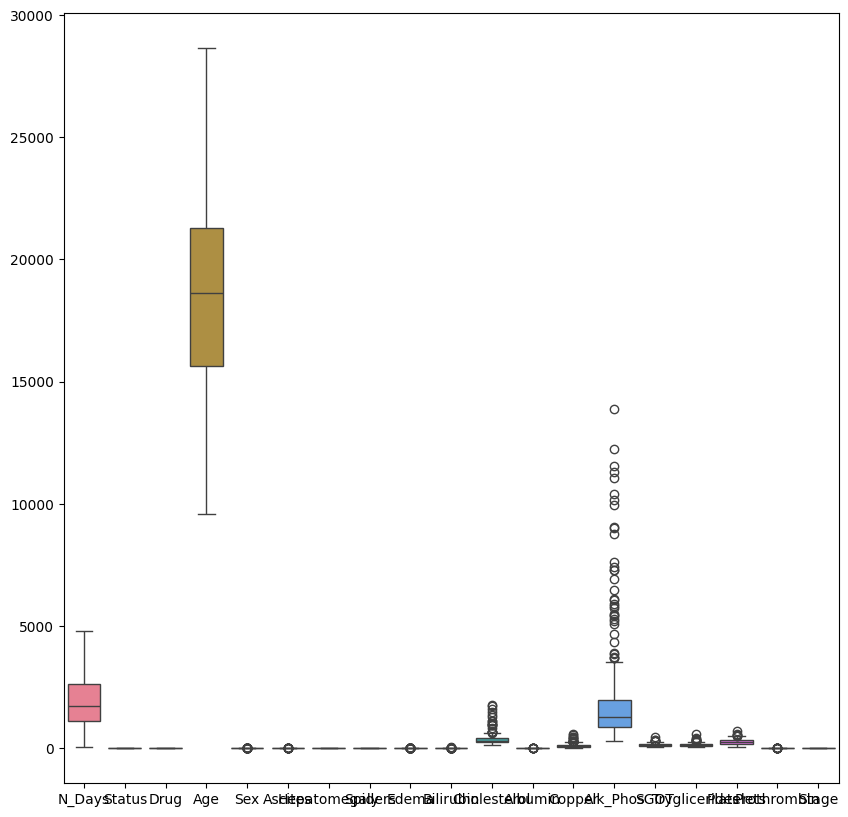

In [96]:
sns.boxplot(data)

Histogram

In [99]:
import plotly.express as px
fig = px.histogram(data)
fig.show()